In [57]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import sys
from matplotlib import cm

In [8]:
%cd /Users/Kunal/Projects/TCH_CardiacSignals_F20/

/Users/kunal/Projects/TCH_CardiacSignals_F20


In [21]:
data = np.load(os.path.join("Working_Data", "Fixed_Dim_HBs_Idx" + "5" + ".npy"))
lead_1 = data[:,:,1]

lead_1_train = lead_1[:30000]
lead_1_test = lead_1[30000:]

In [59]:
#encoder
encoding_dim = 15
input_hb = keras.Input(shape = (100,))

encoded = keras.layers.Dense(250, activation='relu')(input_hb)
encoded = keras.layers.Dropout(0.5)(encoded)
encoded = keras.layers.Dense(32, activation='relu')(encoded)
encoded = keras.layers.Dense(56, activation='relu')(encoded)
encoder_output = keras.layers.Dense(125, activation='relu')(encoded)

decoded = keras.layers.Dense(250, activation='relu')(encoder_output)
decoded = keras.layers.Dropout(0.5)(decoded)
decoded = keras.layers.Dense(512, activation='relu')(decoded)
decoded = keras.layers.Dense(100, activation='linear')(decoded)

autoencoder = keras.Model(inputs=input_hb, outputs=decoded)

encoder = keras.Model(inputs=input_hb, outputs=encoder_output)

# encoded = keras.layers.Dense(encoding_dim, activation = 'relu')(input_hb)
# decoded = keras.layers.Dense(100, activation = "sigmoid")(encoded)

# maps input to reconstruction
# autoencoder = keras.Model(input_hb, decoded)
#
# encoder = keras.Model(input_hb, encoded)

autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')


print("done compiling")

autoencoder.fit(lead_1_train, lead_1_train, epochs = 50, shuffle=True)

done compiling
Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: -0.4899

In [60]:
reconstruction = autoencoder.predict(lead_1_test)
encode = encoder.predict(lead_1_test)

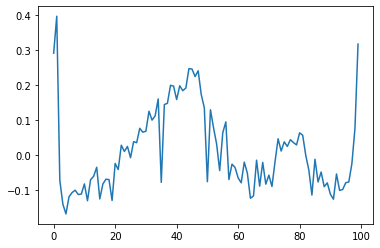

In [61]:
# plt.figure()
plt.plot(reconstruction[2900])

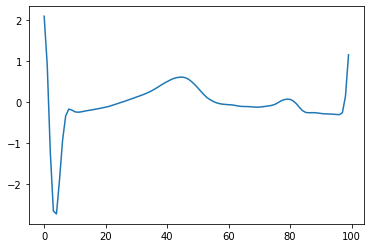

In [63]:
plt.plot(lead_1_test[2900])

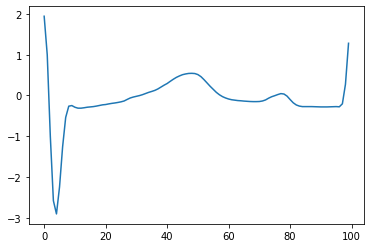

In [48]:
plt.plot(lead_1_test[1])

In [42]:
lead_1_test[0]

array([ 1.79264998,  0.79557422, -1.18590453, -2.72254998, -3.03846659,
       -2.39123028, -1.42915905, -0.71057422, -0.40964849, -0.37832728,
       -0.42324849, -0.45333332, -0.4542091 , -0.44282425, -0.43020304,
       -0.41974544, -0.40964848, -0.39955151, -0.38736818, -0.37680758,
       -0.36467576, -0.35406365, -0.33801667, -0.32230454, -0.30329546,
       -0.28500757, -0.26545758, -0.24340909, -0.21886212, -0.19542273,
       -0.17448182, -0.14903333, -0.12299242, -0.09775   , -0.07250757,
       -0.04396818, -0.01205454,  0.01916364,  0.05259697,  0.09411818,
        0.13955454,  0.18200303,  0.22385909,  0.26677121,  0.30826668,
        0.3417    ,  0.36537121,  0.38020758,  0.38636364,  0.38116061,
        0.35718031,  0.31195001,  0.25036364,  0.17865455,  0.10292728,
        0.02606667, -0.04775455, -0.10725455, -0.14993485, -0.18424393,
       -0.21404545, -0.23635152, -0.25116213, -0.26125909, -0.27045455,
       -0.27802728, -0.28475   , -0.28815001, -0.28415759, -0.26

In [40]:
lead_1_test[1]

array([ 1.94309998e+00,  9.97049987e-01, -9.99599993e-01, -2.58060002e+00,
       -2.90444994e+00, -2.24145007e+00, -1.25715005e+00, -5.38049996e-01,
       -2.62650013e-01, -2.47350007e-01, -2.88150012e-01, -3.11100006e-01,
       -3.11100006e-01, -3.00900012e-01, -2.88150012e-01, -2.80499995e-01,
       -2.72850007e-01, -2.60100007e-01, -2.44800001e-01, -2.29499996e-01,
       -2.21849993e-01, -2.06550002e-01, -1.93800002e-01, -1.83599994e-01,
       -1.70849994e-01, -1.55550003e-01, -1.35150000e-01, -9.69000012e-02,
       -6.12000003e-02, -3.82499993e-02, -2.04000007e-02, -2.55000009e-03,
        2.04000007e-02,  4.84500006e-02,  7.64999986e-02,  9.94499996e-02,
        1.24949999e-01,  1.60650000e-01,  2.06550002e-01,  2.52449989e-01,
        2.93249995e-01,  3.46799999e-01,  3.97799999e-01,  4.43699986e-01,
        4.79400009e-01,  5.09999990e-01,  5.27849972e-01,  5.40600002e-01,
        5.43150008e-01,  5.38049996e-01,  5.12549996e-01,  4.61549997e-01,
        3.87600005e-01,  